In [1]:
import cv2
import numpy as np 
import types
import matplotlib.pyplot as plt
import skimage.metrics

path=r'D:/Study/Python/openCV/College/res/'

In [2]:
def show_img(img):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,'gray')

In [3]:
# Function to convert any msg to binary
def messageToBinary(message):
    if type(message)==str:
        return ''.join([format(ord(i),"08b") for i in message])
    elif type(message)==bytes or type(message)==np.ndarray:
        return [format(i,"08b") for i in message]
    elif type(message)==int or type(message)==np.uint8:
        return format(message,"08b")
    else:
        print("Message type not supported")

In [4]:
def hideData(image, secret_message):

  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)
  secret_message += "#####" # delimeter

  data_index = 0
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #length of data
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel)
          if data_index < data_len:
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)#red
              data_index += 1
          if data_index < data_len:
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)#green
              data_index += 1
          if data_index < data_len:
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)#blue
              data_index += 1
          if data_index >= data_len:
              break

  return image

In [5]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
          binary_data += r[-1] #extracting data from the least significant bit of red pixel
          binary_data += g[-1] 
          binary_data += b[-1] 
  # split by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
          break
  return decoded_data[:-5] #remove the delimeter

In [6]:
def encode_text(): 
  image_name = input("Enter image name(with extension): ") 
  image = cv2.imread(path+image_name) 
  print("The shape of the image is: ",image.shape) 
  print("The original image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500))
  show_img(resized_image) 
  
      
  data = input("Enter data to be encoded : ") 
  if (len(data) == 0): 
    print("Data is empty")
  
  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data)
  cv2.imwrite(filename, encoded_image)

In [7]:
def decode_text():
  image_name = input("Enter the name of the steganographed image that you want to decode (with extension) :") 
  image = cv2.imread(image_name) #read the image using cv2.imread() 

  print("The Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500))  #resize the original image as per your requirement
  show_img(resized_image)
    
  text = showData(image)
  return text

In [8]:
encode_text()

AttributeError: 'NoneType' object has no attribute 'shape'

The Steganographed image is as shown below: 


'[123,234,234,345]'

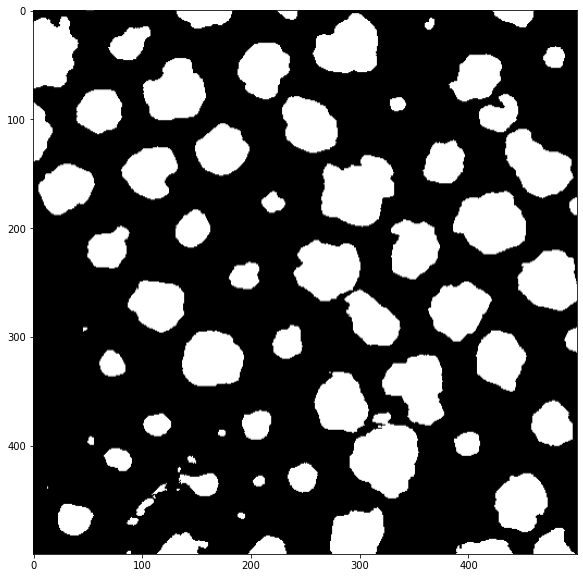

In [20]:
decode_text()